In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [3]:
import os
os.chdir(r'C:\Users\ASUS\Data science in neuroimaging\ndslib-main')
from ndslib.data import load_data
abide_data = load_data("abide2")

In [9]:
abide_data.head()

,site,subject,age,sex,group,age_resid,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,2.0,1.0,13.642852,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,2.0,1.0,16.081732,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,1.0,2.0,12.866264,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,1.0,1.0,13.698139,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,2.0,2.0,14.772459,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


In [21]:
summary = abide_data.groupby("group").mean(numeric_only = True)

In [39]:
summary

,subject,age,sex,age_resid,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
group,,,,,,,,,,,,,,,,,,,,,
1.0,29273.377970,15.037286,1.149028,14.739884,3126.457883,223.701944,394.982721,2602.421166,1751.032397,1301.207343,...,2.547566,3.194184,2.658570,2.714605,3.166724,2.779883,3.046786,2.685890,2.853544,3.171564
2.0,29283.099815,15.156017,1.314233,15.412138,3191.332717,228.462107,395.841035,2623.750462,1744.750462,1295.454713,...,2.539105,3.310734,2.692804,2.728323,3.178689,2.834065,3.055880,2.697181,2.879876,3.226054


## Scikit learn Part 1

The most important thing to know is that all model-fitting routines in Scikit-learn expect
to receive a two-dimensional NumPy array—conventionally named X—as their mandatory first input. The X is expected to contain samples (i.e., independent observations) in rows and features in columns 

In [75]:
features = abide_data.iloc[:, 6:]
phenotypes = abide_data.iloc[:, :6]

In [61]:
phenotypes

,site,subject,age,sex,group,age_resid
0,ABIDEII-KKI_1,29293,8.893151,2.0,1.0,13.642852
1,ABIDEII-OHSU_1,28997,12.000000,2.0,1.0,16.081732
2,ABIDEII-GU_1,28845,8.390000,1.0,2.0,12.866264
3,ABIDEII-NYU_1,29210,8.300000,1.0,1.0,13.698139
4,ABIDEII-EMC_1,29894,7.772758,2.0,2.0,14.772459
...,...,...,...,...,...,...
999,ABIDEII-IU_1,29570,20.000000,1.0,2.0,10.644232
1000,ABIDEII-NYU_1,29233,10.862000,1.0,2.0,16.260139
1001,ABIDEII-SDSU_1,28862,11.200000,1.0,2.0,13.211420
1002,ABIDEII-KKI_1,29312,9.789041,2.0,2.0,14.538742


## Brain-Age Prediction

Y-value is Age vector. and X is features

In [70]:
y = phenotypes['age']
y.values #change to array

array([ 8.89315069, 12.        ,  8.39      , ..., 11.2       ,
        9.7890411 ,  6.194     ])

Conceptually, we can think of fit() and predict() as mapping onto distincttraining and application phases: in the training phase, our model learns how to make predictions, and in the application phase we deterministically use the information our modelhas learned to make predictions.

In [77]:
n_features = 5
X = features.sample(n_features, axis=1, random_state=100) # random_state argument allows us to pass a fixed random seed

In [83]:
#X

Just to underscore how little we had to do, here is the whole example again, in threelines:
1. Initialize the linear regression estimator.
2. Fit the model.
3. Generate predictions.

In [81]:
from sklearn.linear_model import LinearRegression

In [103]:
# Initialize without input
model = LinearRegression()

# Use fit method 
model.fit(X,y) # first arguement is feature data, second is the variable we want to predict in supervised learning
# model.coef_.round(2) #رقم اعشار در پرانتز

# Then we could use the model to predict observations
y_pred = model.predict(X) # yˆ = 53.81 − 3.94x1 + 0.02x2 − 8.92x3 − 0.01x5 this would the model. now it takes X values to give you Y pred

In [105]:
y_pred

array([15.69036168, 11.17854891, 16.67486452, ..., 11.42650131,
       10.54443185, 14.57754089])

In [109]:
y.values

array([ 8.89315069, 12.        ,  8.39      , ..., 11.2       ,
        9.7890411 ,  6.194     ])

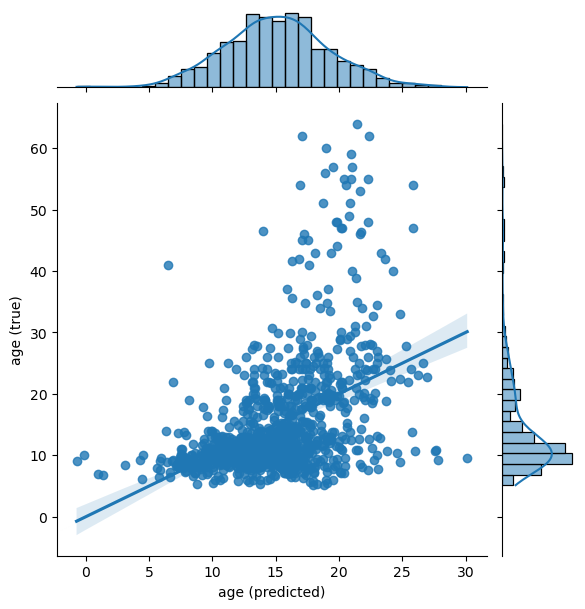

In [113]:
import seaborn as sns
g = sns.jointplot(x=y_pred, y=y, kind="reg").set_axis_labels("age (predicted)", "age (true)")

### Quantify the quality of the predictions

The coefficient of determination, or R2, which quantifies the proportion of variance
in the outcome variable (e.g., age) explained by the fitted model. 

The mean_squared_error function computes mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

In [125]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y, y_pred) # ONLY 20% explained by the model

0.2000318750191794

In [127]:
mean_squared_error(y, y_pred) 

71.12203600704493

## Classification Example: Autism Classification

In [143]:
corrs = features.corrwith(phenotypes['group']) #it said: corr between features and phenotypes
print(corrs.sort_values().round(2))

fsCT_L_OFC_ROI      -0.14
fsCT_L_10d_ROI      -0.12
fsCT_R_31pd_ROI     -0.10
fsVol_L_10d_ROI     -0.10
fsCT_L_10v_ROI      -0.09
                     ... 
fsVol_L_STSvp_ROI    0.15
fsArea_R_OFC_ROI     0.15
fsLGI_R_OFC_ROI      0.15
fsLGI_L_OFC_ROI      0.19
fsArea_L_OFC_ROI     0.19
Length: 1440, dtype: float64


In [149]:
corrs.max() # it means that none of the features alone could have a good association with ASD/Control groups

0.18984517056635034

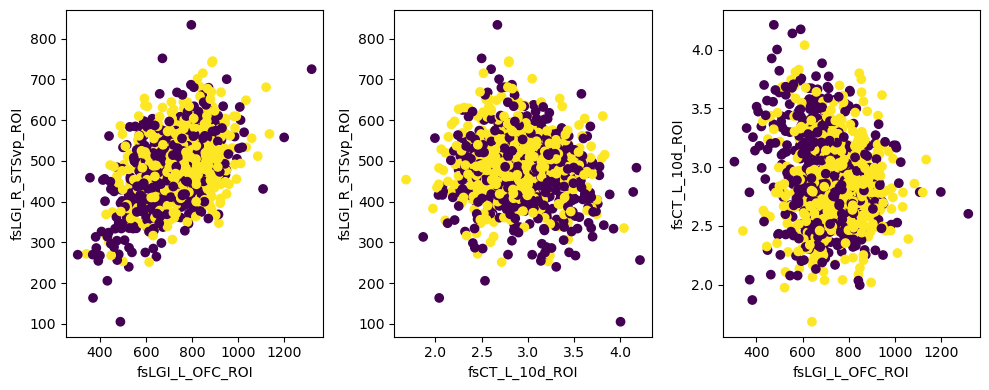

In [159]:
fs_vars = ['fsLGI_L_OFC_ROI', 'fsLGI_R_STSvp_ROI', 'fsCT_L_10d_ROI']
x, y, z = features[fs_vars].values.T

fig, ax = plt.subplots(1, 3)
ax[0].scatter(x, y, c=phenotypes['group'])
ax[0].set(xlabel=fs_vars[0], ylabel=fs_vars[1])
ax[1].scatter(z, y, c=phenotypes['group'])
ax[1].set(xlabel=fs_vars[2], ylabel=fs_vars[1])
ax[2].scatter(x, z, c=phenotypes['group'])
ax[2].set(xlabel=fs_vars[0], ylabel=fs_vars[2])
fig.set_tight_layout("tight")
fig.set_size_inches([10,4])

We Should scale things up to higher dimensions.

In [175]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y = phenotypes['group']
gnb = gnb.fit(features, y)
y_pred = gnb.predict(features)

Gaussian Naive Bayes (GNB) classifier: This is a simple classification approach based on a naive application of Bayes’ Theorem. The naivete stemsfrom the classifier’s assumption that all features are independent of one another once wecondition on class assignment. This assumption greatly simplifies analysis, though it isnearly always false. GNB is a good classifier to use as a performance baseline, because itdoes surprisingly well in many situations and is extremely computationally efficient, so itshould be quick. Naive Bayes classifiers have no trouble handling large sets of highly correlated features and are also relatively resilient to overfitting

In [178]:
print(gnb.score(features, y)) # it is the overall accuracy

0.6254980079681275


### Quantify the quality of the Classification

We can get some more information using the
classification_report utility, which breaks down classification performance
into separate precision, recall, and f1-score metrics (we could also get each
of these individually from the sklearn.metrics module). Precision is also known
as positive predictive value; it tells us the proportion of cases labeled as positive that truly
are positive, i.e., the proportion of cases the classifier labels autistic that really are autistic.
Recall (or sensitivity) tells us the proportion of true positive cases that were labeled as
such by the classifier. The F1 score is the harmonic mean of recall and precision and thus
tries to summarize both using a single quantity

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.44      0.52       463
         2.0       0.62      0.78      0.69       541

    accuracy                           0.63      1004
   macro avg       0.63      0.61      0.61      1004
weighted avg       0.63      0.63      0.61      1004



In [184]:
y_pred

array([2., 2., 2., ..., 2., 2., 1.])

In [188]:
y.values

array([1., 1., 2., ..., 2., 2., 1.])

## Clustering Example: Are There Neural Subtypes of Autism?

Clustering estimators in Scikit-learn are located, as you might intuit, in the sklearn.cluster module. We
will focus our attention on what is arguably the most widely used clustering algorithm,
namely, k-means.


In [192]:
features

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,632.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,302.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,456.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,407.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,315.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3321.0,290.0,381.0,2802.0,1827.0,1314.0,184.0,1992.0,1668.0,579.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,2860.0,162.0,456.0,2460.0,1718.0,1225.0,240.0,2459.0,1721.0,574.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,3377.0,177.0,497.0,2810.0,1866.0,1343.0,254.0,1758.0,1318.0,436.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,3322.0,297.0,426.0,2640.0,1726.0,1242.0,318.0,1719.0,1310.0,444.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


In [217]:
n_features = 2
idx = phenotypes['group'] == 1
ASD = features[idx]
dx_1 = ASD.sample(n_features, axis=1, random_state=100)
columns = dx_1.columns

The sklearn.preprocessing module contains a bunch of useful utilities. Inthis case we are going to standardize our columns (i.e., to transform them so they havea mean of zero and variance of one). Otherwise, k-means will likely weigh some featuresmore than others.

In [220]:
from sklearn.preprocessing import scale
dx_1 = scale(dx_1)

In [222]:
dx_1

array([[ 7.94799206e-01, -9.79011270e-01],
       [ 1.17062086e+00, -1.67457230e+00],
       [-2.94119934e-01,  4.49372987e-01],
       [ 2.62385202e-01,  8.71677897e-01],
       [-2.29073879e-01,  1.38854670e-01],
       [-2.67083753e-02,  2.13379066e-01],
       [-8.16897485e-01,  8.84098630e-01],
       [-2.65264170e+00, -2.21346577e-01],
       [ 2.69612541e-01,  2.70680762e-02],
       [ 5.29796760e-01,  8.09574234e-01],
       [ 2.29326758e+00, -1.38889545e+00],
       [-8.98807332e-01,  1.49271453e+00],
       [-2.55386806e+00, -5.98770525e-02],
       [-1.68899644e+00,  1.92744017e+00],
       [ 1.73248015e-01,  1.38092794e+00],
       [-3.06165500e-01, -3.70395369e-01],
       [-3.30256631e-01, -1.34401448e-01],
       [ 1.82108140e+00,  3.00324195e-01],
       [-2.77256142e-01,  3.99690056e-01],
       [-1.02649033e+00, -1.11563933e+00],
       [ 5.37024100e-01,  8.96519363e-01],
       [-6.79578036e-01,  1.09525109e+00],
       [ 6.81570888e-01, -9.29328339e-01],
       [-3.

In [225]:
from sklearn.cluster import KMeans
K = 4 # There are literally hundreds of methods people have developed to try to identify the optimal value of k: See the sklearn.metrics module.
km = KMeans(K)
clusters = km.fit_predict(dx_1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


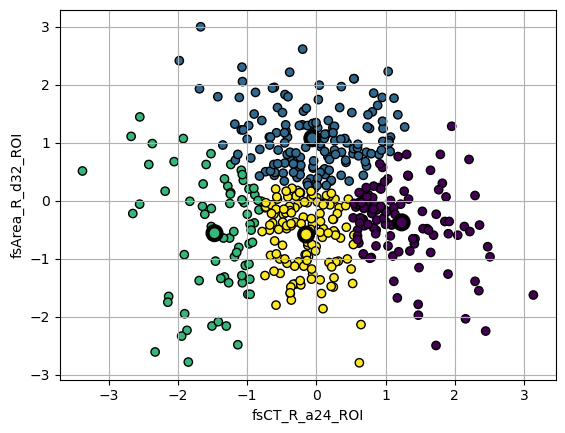

In [230]:
fig, ax = plt.subplots()
ax.scatter(dx_1[:, 0], dx_1[:, 1], c=clusters, edgecolor='k')
ax.scatter(*km.cluster_centers_.T, c=[0,1,2,3], edgecolor='k', linewidth=3, s=100)
ax.set_xlabel(columns[0])
ax.set_ylabel(columns[1])
g = ax.grid(None)

### Quantify the quality of the Clusters

The clustering looks reasonable to the eye. . . but how far should we trust it? One way to assess clustering results is using internal validation methods. These methods look at the properties of the clusters and the data and quantify how well the clustering describes the observed data. 

In [236]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(dx_1, clusters) #The higher this number, the more well-separated the clusters

255.76457197242192

Another approach tovalidate the results of clustering is via external validation. In this approach, some other datais used to determine whether the results of clustering make sense. For example, if the clusters represent meaningful differences in brain structure, we might hypothesize that theclusters could also differ in some other measurement. That is, we might validate the clustering of brain properties by looking at behavioral differences between participants thatend up in each of the different clusters. 